# EDA of SPX Data

### Plan for EDA
Each section will compare overall vs put vs call
1. Describing the data
2. Correlation Analyses
3. Time Series Data
4. Greeks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Describing the data

In [2]:
df = pd.read_csv('L3_SPX_20240423.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   underlying       7080 non-null   object 
 1   underlying_last  7080 non-null   float64
 2    exchange        7080 non-null   object 
 3   optionroot       7080 non-null   object 
 4   optionext        0 non-null      float64
 5   type             7080 non-null   object 
 6   expiration       7080 non-null   object 
 7   quotedate        7080 non-null   object 
 8   strike           7080 non-null   int64  
 9   last             7080 non-null   float64
 10  bid              7080 non-null   float64
 11  ask              7080 non-null   float64
 12  volume           7080 non-null   int64  
 13  openinterest     7080 non-null   int64  
 14  impliedvol       7080 non-null   float64
 15  delta            7080 non-null   float64
 16  gamma            7080 non-null   float64
 17  theta         

### Dropping null columns
`optionext`, `optionalias`, `IVBid` and `IVAsk` are entirely null.

In [4]:
df = df.drop(['optionext','optionalias','IVBid','IVAsk'],axis=1)

### Converting relevant columns to datetime
`expiration` and `quotedate`

In [5]:
df['expiration'] = pd.to_datetime(df['expiration'])
df['quotedate'] = pd.to_datetime(df['quotedate'])


## Splitting the df into puts and calls for additional comparisons

In [6]:
df_put = df[df['type'] == 'put']
df_call = df[df['type'] == 'call']

In [7]:
df_put.describe()

underlying_last        strike         last          bid          ask  \
count     3.540000e+03   3540.000000  3540.000000  3540.000000  3540.000000   
mean      5.070470e+03   4630.224576   207.101040   337.105071   343.032218   
std       1.209799e-10   1531.621465   526.818957   674.351064   683.517017   
min       5.070470e+03    200.000000     0.000000     0.000000     0.050000   
25%       5.070470e+03   3850.000000     2.537500    15.000000    15.475000   
50%       5.070470e+03   4730.000000    38.000000    75.950000    76.950000   
75%       5.070470e+03   5375.000000   181.067500   318.225000   324.400000   
max       5.070470e+03  12000.000000  6379.000000  6001.500000  6069.900000   

             volume   openinterest   impliedvol        delta        gamma  \
count   3540.000000    3540.000000  3540.000000  3540.000000  3540.000000   
mean     123.066667    2620.217514     0.161742    -0.382975     0.000342   
std      807.536065    8371.439389     0.118421     0.393741     0.000467   
min        0.000000       0.000000     0.044400    -1.000000     0.000000   
25%        0.000000       7.000000     0.091075    -0.837150     0.000000   
50%        0.000000     293.000000     0.128400    -0.200950     0.000100   
75%       12.000000    2076.500000     0.203675    -0.027600     0.000500   
max    25205.000000  205201.000000     1.902800     0.000000     0.002500   

             theta         vega  
count  3540.000000  3540.000000  
mean    -46.130479   599.882322  
std     100.344809   762.038302  
min    -479.013500     0.000000  
25%    -109.727375     5.431075  
50%     -35.060400   339.288050  
75%       0.000000   937.007150  
max     159.566200  4813.935000

In [8]:
df_call.describe()

underlying_last        strike         last          bid          ask  \
count     3.540000e+03   3540.000000  3540.000000  3540.000000  3540.000000   
mean      5.070470e+03   4630.224576   459.423952   913.666610   927.805311   
std       1.209799e-10   1531.621465   804.929284  1043.228357  1055.702579   
min       5.070470e+03    200.000000     0.000000     0.000000     0.050000   
25%       5.070470e+03   3850.000000     0.000000   109.250000   110.850000   
50%       5.070470e+03   4730.000000    77.525000   537.700000   545.150000   
75%       5.070470e+03   5375.000000   618.035000  1380.350000  1414.350000   
max       5.070470e+03  12000.000000  4990.840000  4862.600000  4876.700000   

            volume   openinterest   impliedvol        delta        gamma  \
count  3540.000000    3540.000000  3540.000000  3540.000000  3540.000000   
mean     49.859322    1472.994633     0.208374     0.633566     0.000336   
std     372.502122    6804.913539     0.115258     0.352868     0.000424   
min       0.000000       0.000000     0.120100     0.000000     0.000000   
25%       0.000000       0.000000     0.133300     0.329200     0.000000   
50%       0.000000      28.500000     0.146700     0.761150     0.000200   
75%       1.000000     659.250000     0.257025     0.954725     0.000500   
max    8806.000000  188256.000000     0.710700     1.000000     0.002500   

             theta         vega  
count  3540.000000  3540.000000  
mean   -158.401261   813.917397  
std     109.798771   869.410119  
min    -536.338600     0.000000  
25%    -243.255175    52.178025  
50%    -158.961050   639.090800  
75%     -55.298525  1242.278425  
max       0.000000  4813.661500

### Histograms of key numerical features

<Figure size 864x576 with 0 Axes>

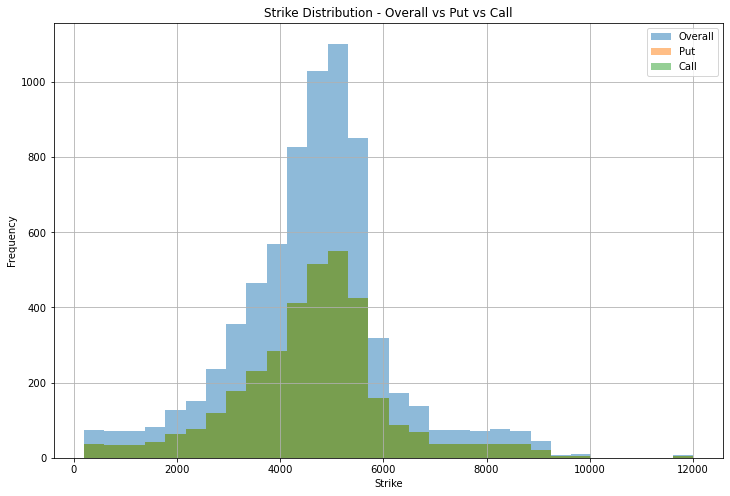

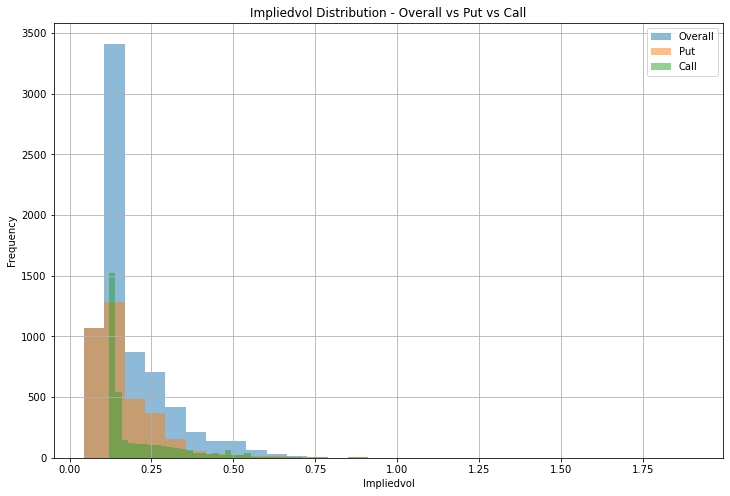

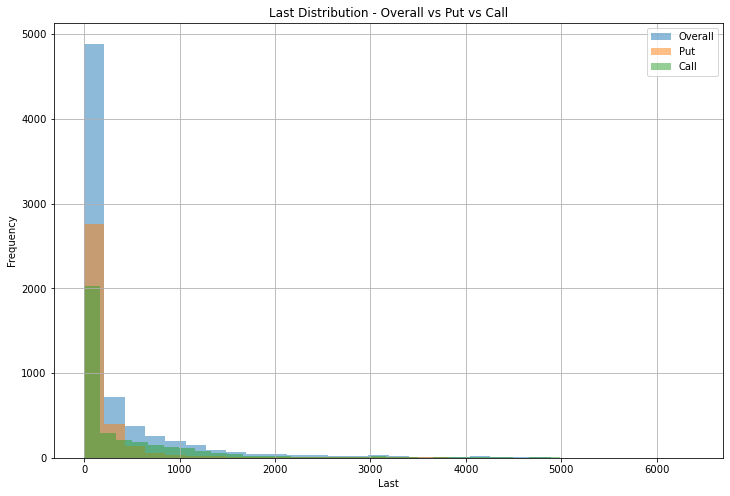

In [9]:
plt.figure(figsize=(12, 8))

for col in ['strike', 'impliedvol', 'last']:
    plt.figure(figsize=(12, 8))
    df[col].hist(alpha=0.5, label='Overall', bins=30)
    df_put[col].hist(alpha=0.5, label='Put', bins=30)
    df_call[col].hist(alpha=0.5, label='Call', bins=30)
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution - Overall vs Put vs Call')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.show()


### Box Plots of values and detecting of outliers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


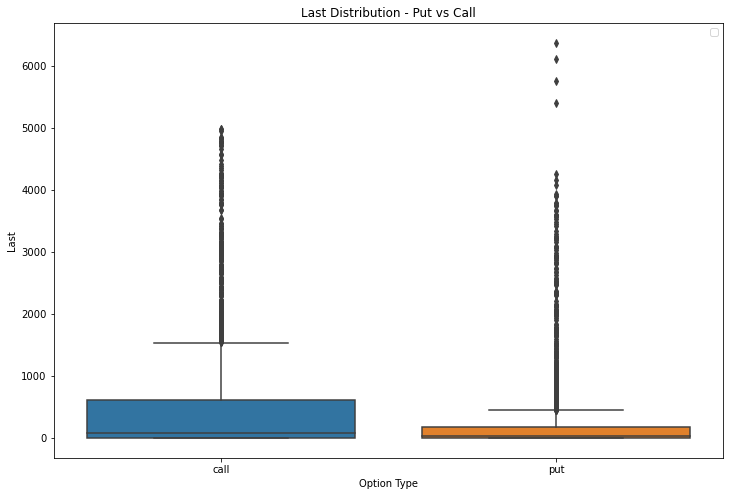

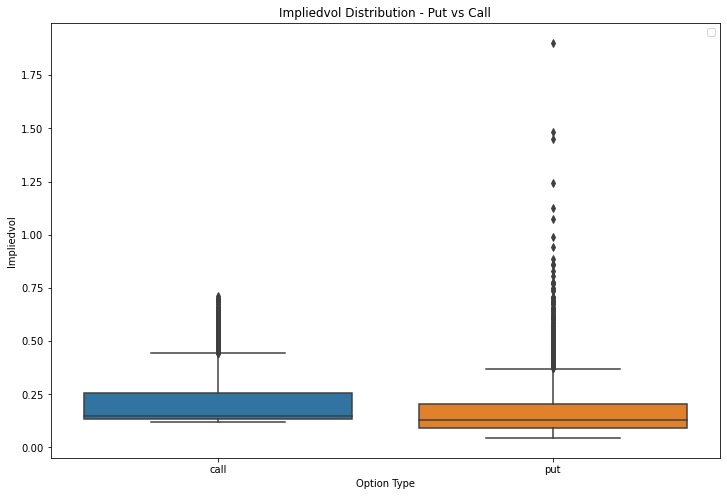

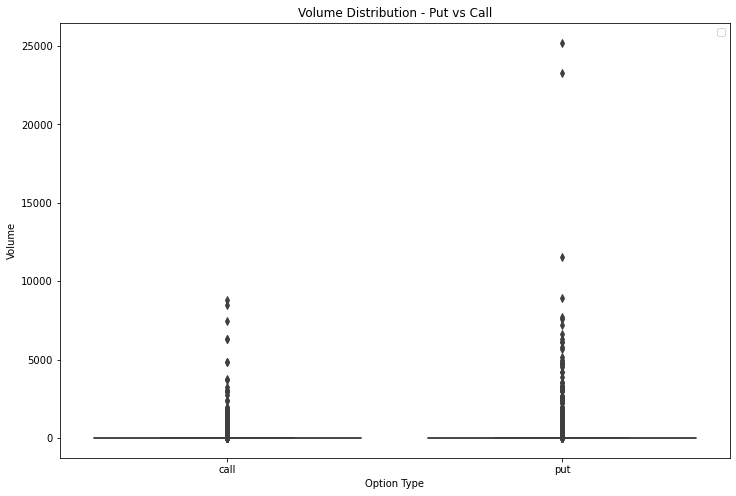

In [10]:
for col in ['last', 'impliedvol', 'volume']:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='type', y=col, data=df)
    plt.legend()
    plt.title(f'{col.capitalize()} Distribution - Put vs Call')
    plt.xlabel("Option Type")
    plt.ylabel(col.capitalize())

# Show plot
plt.show()


# 2. Correlation Analyses

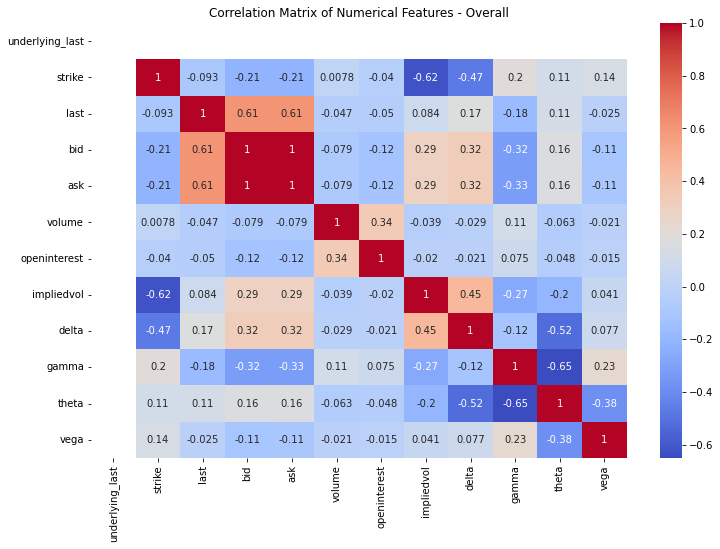

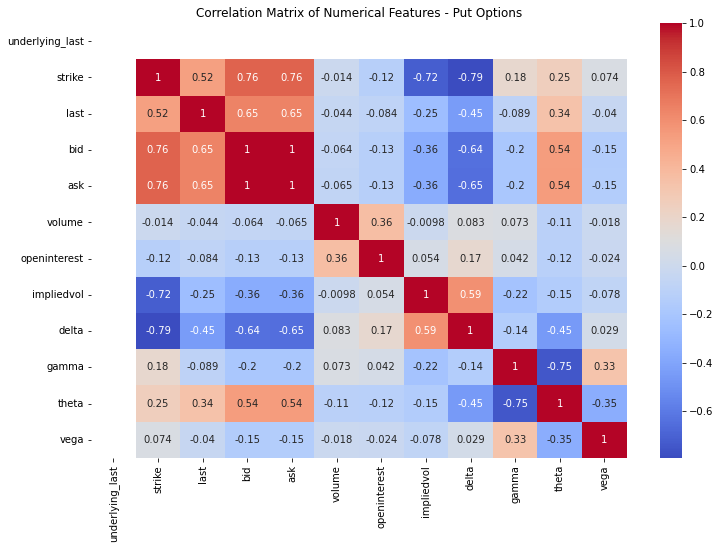

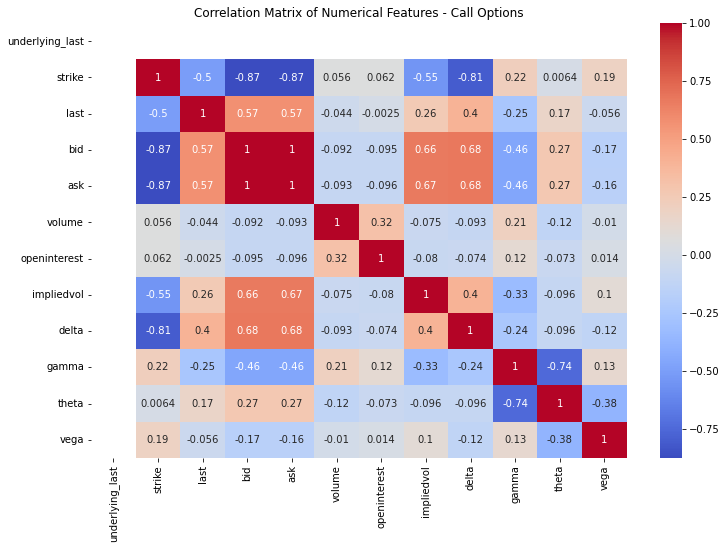

In [11]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Overall')
plt.show()

# Put
numeric_df_put = df_put.select_dtypes(include=['float64', 'int64'])

corr_matrix_put = numeric_df_put.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_put, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Put Options')
plt.show()

# Call
numeric_df_call = df_call.select_dtypes(include=['float64', 'int64'])

corr_matrix_call = numeric_df_call.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_call, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features - Call Options')
plt.show()


### Pairplots for Overall

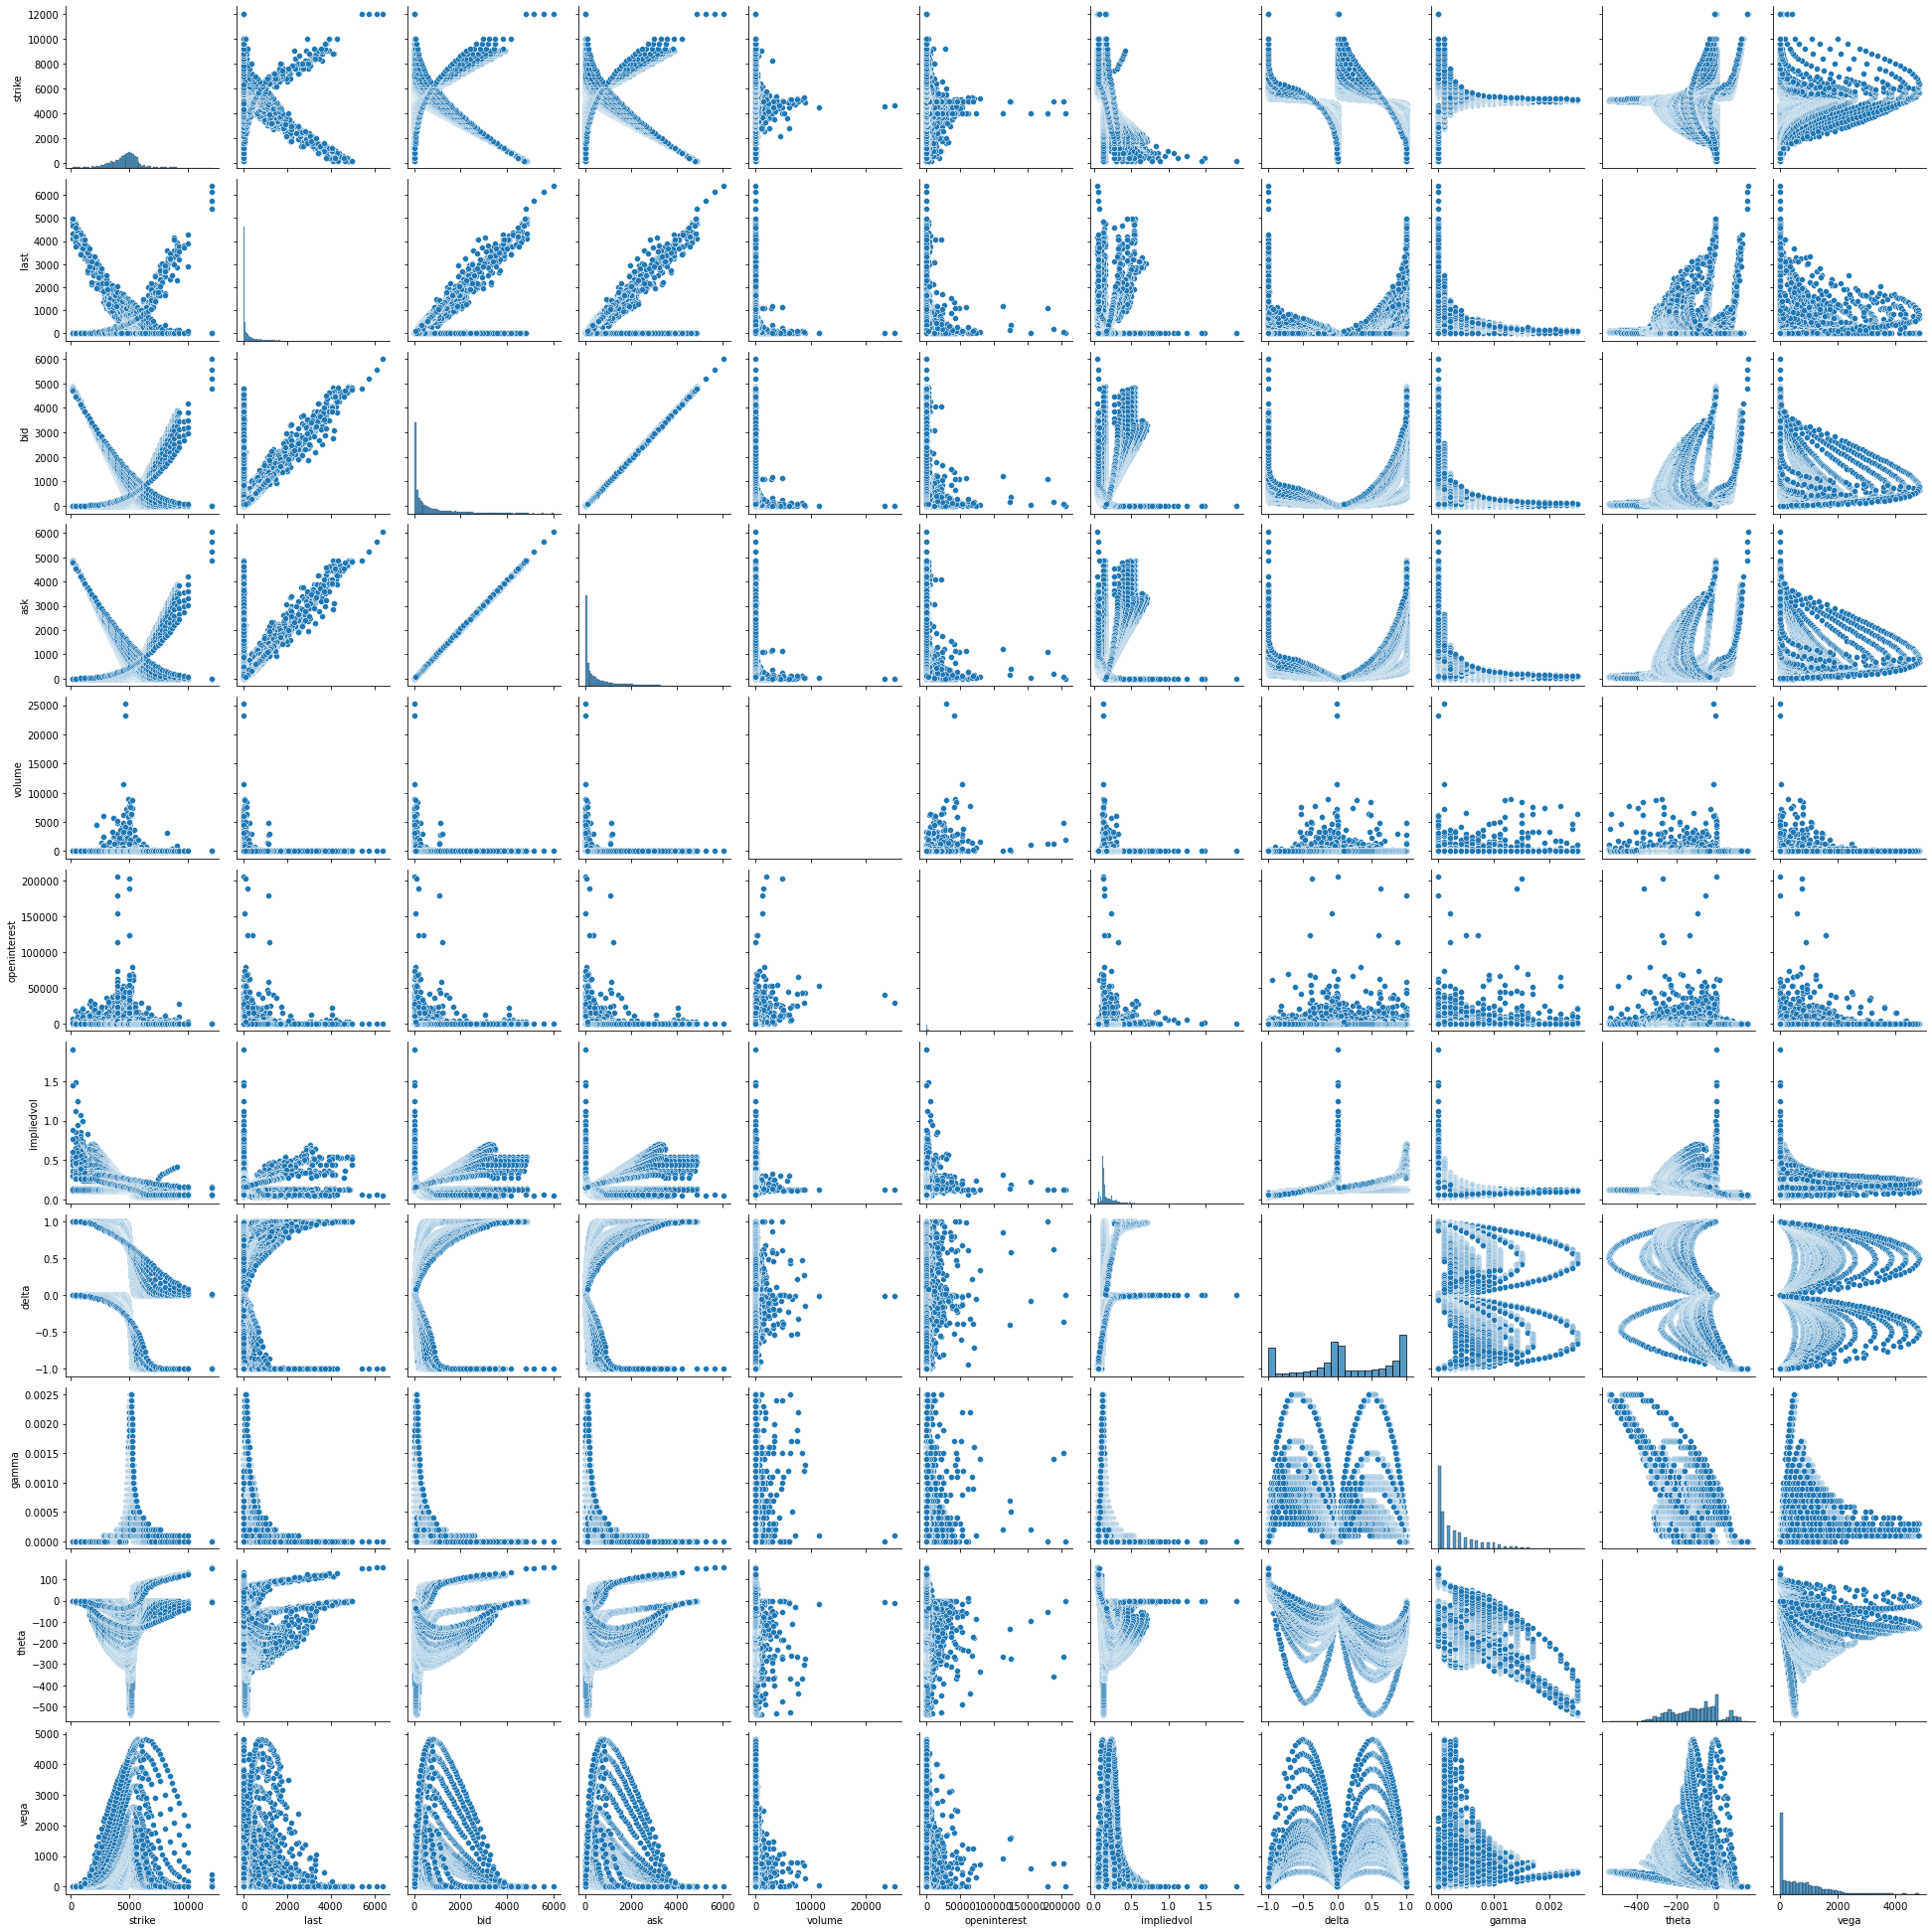

In [12]:
sns.pairplot(df[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

### Pairplots for Puts

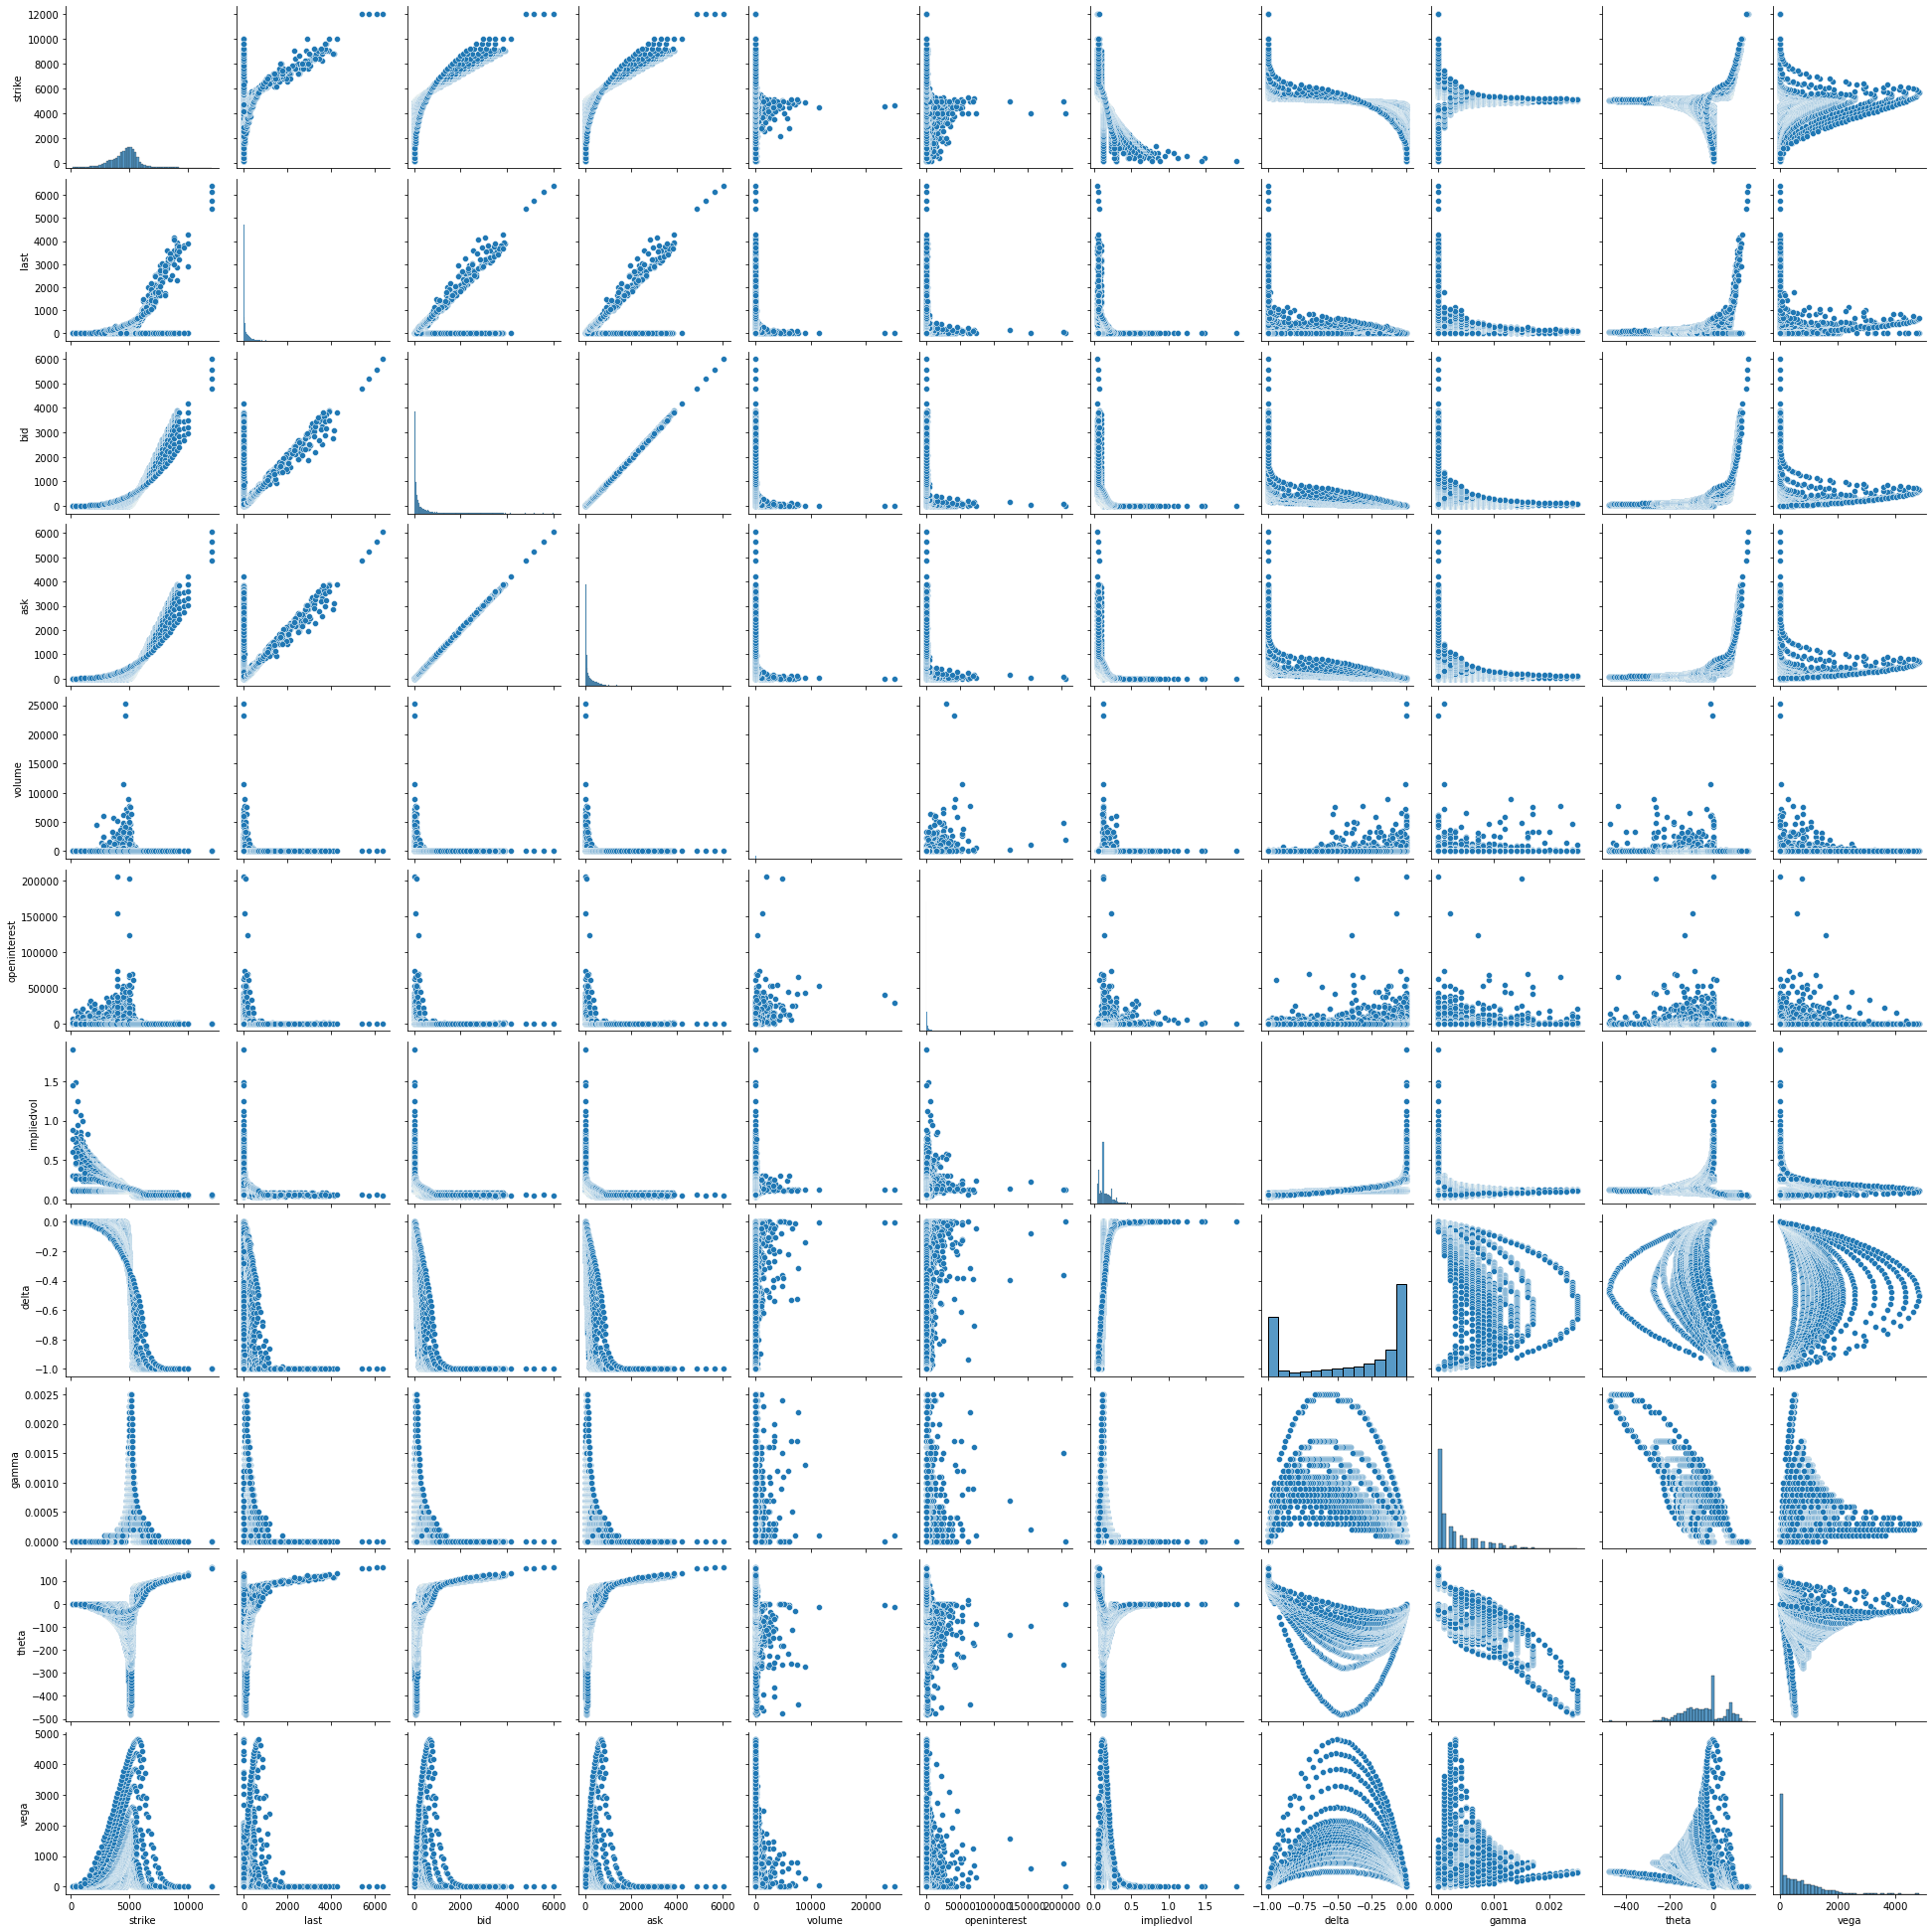

In [13]:
sns.pairplot(df_put[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

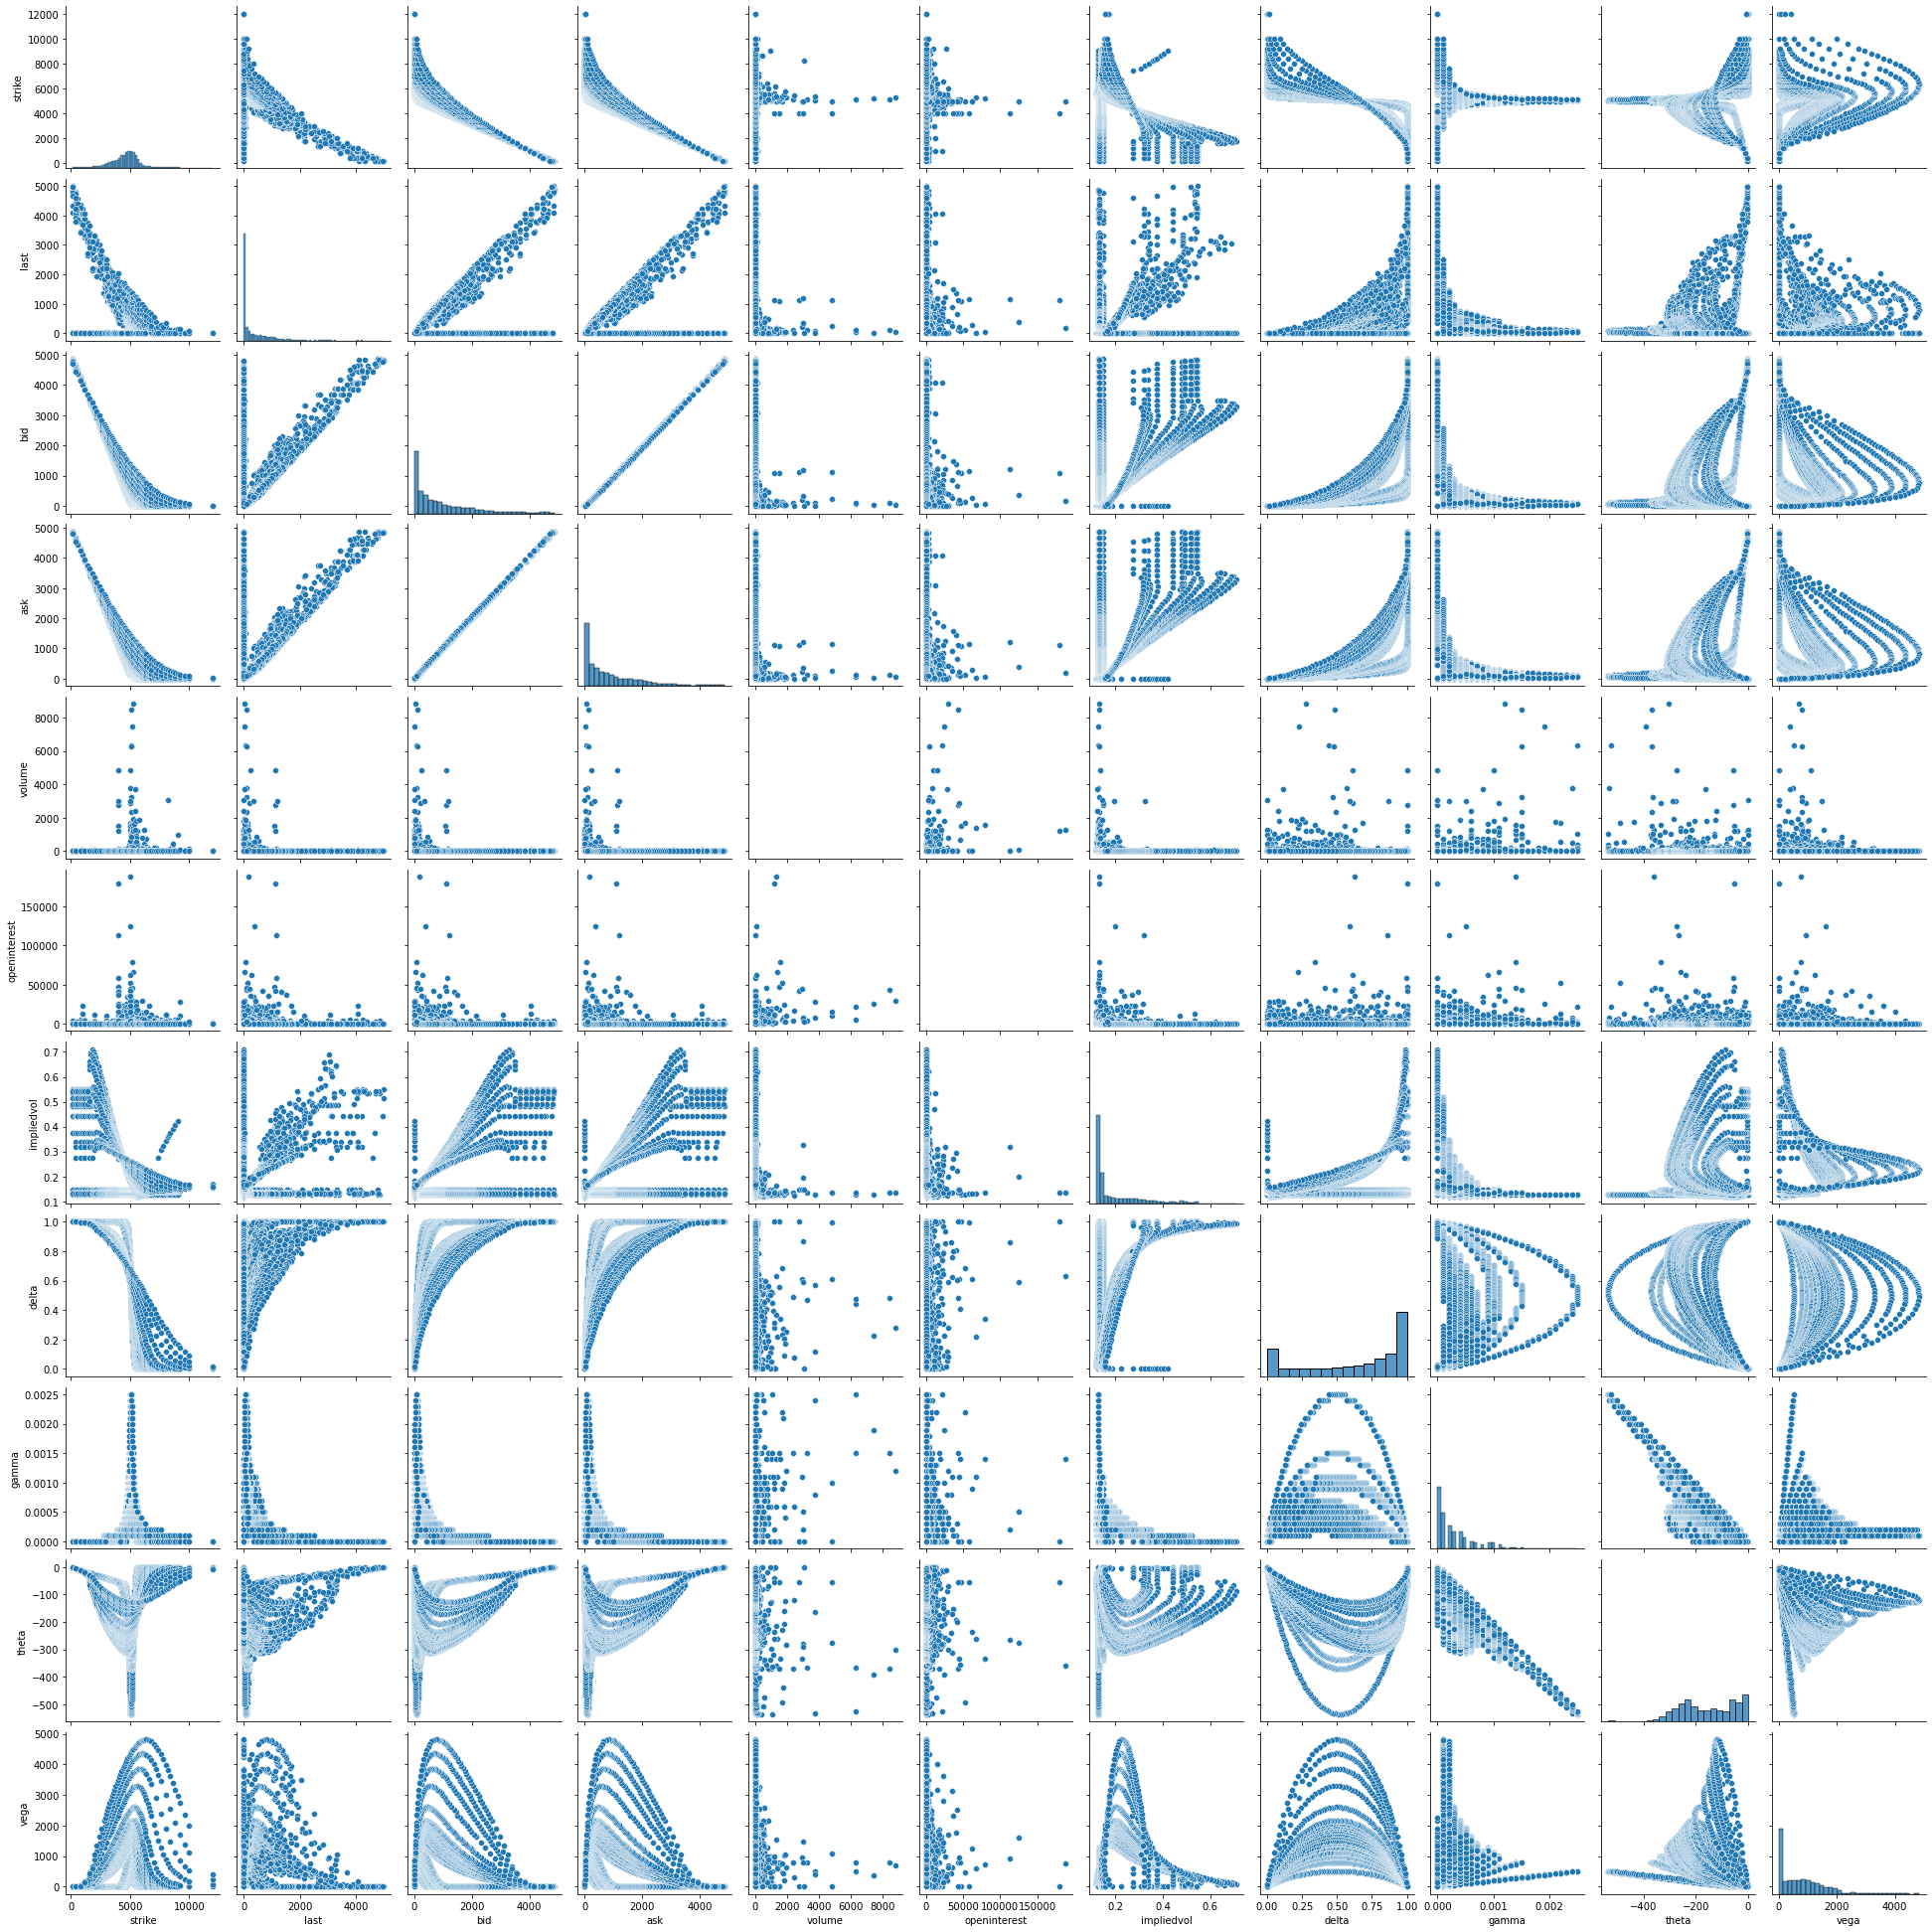

In [14]:
sns.pairplot(df_call[['strike','last','bid','ask','volume','openinterest','impliedvol','delta','gamma','theta','vega']])

# 3. Time Series Data

In [15]:
df.head()

underlying  underlying_last  exchange          optionroot  type expiration  \
0        SPX        5070.4702         *  SPX240517C00200000  call 2024-05-17   
1        SPX        5070.4702         *  SPX240517P00200000   put 2024-05-17   
2        SPX        5070.4702         *  SPX240517C00400000  call 2024-05-17   
3        SPX        5070.4702         *  SPX240517P00400000   put 2024-05-17   
4        SPX        5070.4702         *  SPX240517C00600000  call 2024-05-17   

            quotedate  strike     last     bid      ask  volume  openinterest  \
0 2024-04-23 16:00:00     200  4864.98  4862.6  4870.80       6           995   
1 2024-04-23 16:00:00     200     0.05     0.0     0.05       0          1099   
2 2024-04-23 16:00:00     400  4790.63  4663.4  4671.60       0            10   
3 2024-04-23 16:00:00     400     0.05     0.0     0.05       0           583   
4 2024-04-23 16:00:00     600  3930.11  4464.2  4472.40       0             3   

   impliedvol  delta  gamma   theta  vega  
0      0.1255    1.0    0.0 -2.7176   0.0  
1      0.1284    0.0    0.0  0.0000   0.0  
2      0.1255    1.0    0.0 -5.4353   0.0  
3      0.1284    0.0    0.0  0.0000   0.0  
4      0.1255    1.0    0.0 -8.1529   0.0

<AxesSubplot:xlabel='expiration', ylabel='underlying_last'>

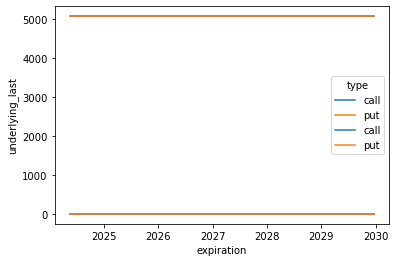

In [16]:
sns.lineplot(x='expiration', y='underlying_last', hue='type', data=df)
sns.lineplot(x='expiration', y='impliedvol', hue='type', data=df)

<AxesSubplot:xlabel='expiration', ylabel='last'>

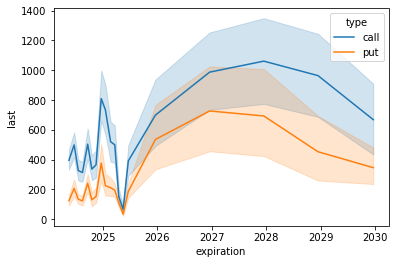

In [17]:
sns.lineplot(x='expiration',y='last',hue='type',data=df)

# 4. Greeks

<AxesSubplot:>

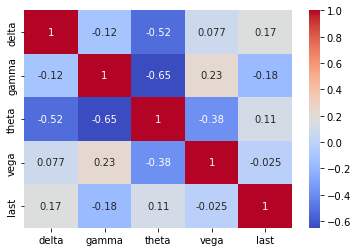

In [18]:
sns.heatmap(df[['delta', 'gamma', 'theta', 'vega', 'last']].corr(), annot=True, cmap='coolwarm')


<AxesSubplot:xlabel='delta', ylabel='last'>

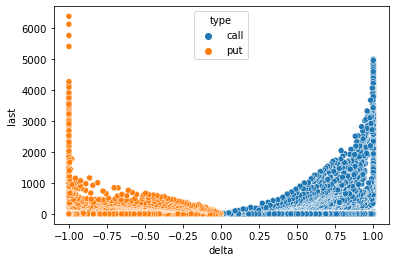

In [19]:
sns.scatterplot(x='delta', y='last', hue='type', data=df)


<AxesSubplot:xlabel='gamma', ylabel='last'>

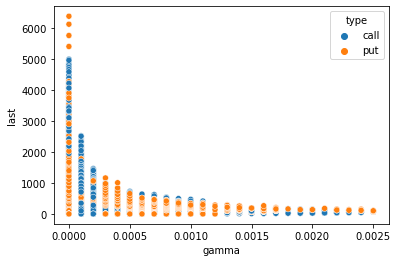

In [20]:
sns.scatterplot(x='gamma', y='last', hue='type', data=df)

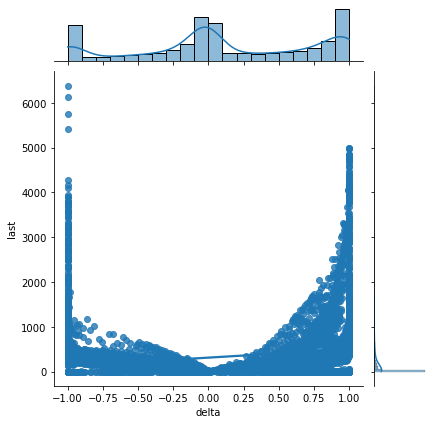

In [21]:
sns.jointplot(x='delta', y='last', data=df, kind='reg')
